In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cvxpy as cp

In [6]:
L_1 = [(.1, .5, -1), (.4, .4, -1), (.3, .8, 1), (.9, .7, 1)]
L_2 = [(.1, .3, -1), (.6, .4, -1), (.2, .8, 1), (.7, .6, 1)]
L_3 = [(.4, .2, -1), (.9, .3, -1), (.2, .6, 1), (.5, .7, 1)]

U = [(.1, .5), (.3, .7), (.5, .4), (.8, .3), (.9, .2), (1, .5)] # U_1 = U_2 = U_3 = U ということでいいのか


display(L_1)
display(L_2)
display(L_3)
print()
display(U)

[(0.1, 0.5, -1), (0.4, 0.4, -1), (0.3, 0.8, 1), (0.9, 0.7, 1)]

[(0.1, 0.3, -1), (0.6, 0.4, -1), (0.2, 0.8, 1), (0.7, 0.6, 1)]

[(0.4, 0.2, -1), (0.9, 0.3, -1), (0.2, 0.6, 1), (0.5, 0.7, 1)]

[(0.1, 0.5), (0.3, 0.7), (0.5, 0.4), (0.8, 0.3), (0.9, 0.2), (1, 0.5)]

In [7]:
U = np.array(U).T

display(U)

array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. ],
       [0.5, 0.7, 0.4, 0.3, 0.2, 0.5]])

In [8]:
x_L_1, y_L_1 = np.array([[x_l[0], x_l[1]] for x_l in L_1]).T, np.array([[y_l[2]] for y_l in L_1]).T
x_L_2, y_L_2 = np.array([[x_l[0], x_l[1]] for x_l in L_2]).T, np.array([[y_l[2]] for y_l in L_2]).T
x_L_3, y_L_3 = np.array([[x_l[0], x_l[1]] for x_l in L_3]).T, np.array([[y_l[2]] for y_l in L_3]).T

display(x_L_1)
display(y_L_1)
print()
display(x_L_2)
display(y_L_2)
print()
display(x_L_3)
display(y_L_3)

array([[0.1, 0.4, 0.3, 0.9],
       [0.5, 0.4, 0.8, 0.7]])

array([[-1, -1,  1,  1]])

array([[0.1, 0.6, 0.2, 0.7],
       [0.3, 0.4, 0.8, 0.6]])

array([[-1, -1,  1,  1]])

array([[0.4, 0.9, 0.2, 0.5],
       [0.2, 0.3, 0.6, 0.7]])

array([[-1, -1,  1,  1]])

In [9]:
x_L = [x_L_1, x_L_2, x_L_3]
x_L

[array([[0.1, 0.4, 0.3, 0.9],
        [0.5, 0.4, 0.8, 0.7]]),
 array([[0.1, 0.6, 0.2, 0.7],
        [0.3, 0.4, 0.8, 0.6]]),
 array([[0.4, 0.9, 0.2, 0.5],
        [0.2, 0.3, 0.6, 0.7]])]

In [10]:
y_L = [y_L_1, y_L_2, y_L_3]
y_L

[array([[-1, -1,  1,  1]]),
 array([[-1, -1,  1,  1]]),
 array([[-1, -1,  1,  1]])]

In [11]:
x_U_1 = U
x_U_2 = U
x_U_3 = U

x_U = [x_U_1, x_U_2, x_U_3]

display(x_U)


[array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. ],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5]]),
 array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. ],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5]]),
 array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. ],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5]])]

In [12]:
x_S_1 = np.hstack([x_U_1, x_L_1])
x_S_2 = np.hstack([x_U_2, x_L_2])
x_S_3 = np.hstack([x_U_3, x_L_3])

x_S = [x_S_1, x_S_2, x_S_3]

x_S

[array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. , 0.1, 0.4, 0.3, 0.9],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5, 0.5, 0.4, 0.8, 0.7]]),
 array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. , 0.1, 0.6, 0.2, 0.7],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5, 0.3, 0.4, 0.8, 0.6]]),
 array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. , 0.4, 0.9, 0.2, 0.5],
        [0.5, 0.7, 0.4, 0.3, 0.2, 0.5, 0.2, 0.3, 0.6, 0.7]])]

In [13]:
# 6 x 12 の行列
M_1 = np.array([[-1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                [0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1]])

M_2 = np.array([[-1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                [0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1]])

M = [M_1, M_2]
print(M)

[array([[-1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1]]), array([[-1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1]])]


In [14]:
# 6 x 1 の行列（列ベクトル）
q_1 = np.array([[1, 1, 1, 1, 1, 1]]).T
q_2 = np.array([[1, 1, 1, 1, 1, 1]]).T

q = [q_1, q_2]
print(q)

[array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]]), array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]])]


In [69]:
# 通常の内積

def kernel_function(x1, x2):
    return x1.T @ x2

k = kernel_function


# 変数
lambda_j_l = cp.Variable(shape=(3, 4), nonneg=True) # j \in {1, 2, 3}, l \in {1, 2, 3, 4}
lambda_h_i = cp.Variable(shape=(2, 6), nonneg=True) # h \in {1, 2}, i \in {1, 2, 3, 4, 5, 6}
eta_j_s = cp.Variable(shape=(3, 10), nonneg=True) # j \in {1, 2, 3}, s \in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
eta_hat_j_s = cp.Variable(shape=(3, 10), nonneg=True) # j \in {1, 2, 3}, s \in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

lambda_j_l, lambda_h_i, eta_j_s, eta_hat_j_s

(Variable((3, 4), nonneg=True),
 Variable((2, 6), nonneg=True),
 Variable((3, 10), nonneg=True),
 Variable((3, 10), nonneg=True))

In [71]:
display(lambda_j_l.value)

None

In [72]:
len_j = 3
len_l = 4

len_h = 2
len_I_h = 6

len_u = 12

len_s = 10

# とりあえずこれで
x_U_tmp = np.hstack([x_U[:2][1], x_U[1:][0]])
x_U_tmp

array([[0.1, 0.3, 0.5, 0.8, 0.9, 1. , 0.1, 0.3, 0.5, 0.8, 0.9, 1. ],
       [0.5, 0.7, 0.4, 0.3, 0.2, 0.5, 0.5, 0.7, 0.4, 0.3, 0.2, 0.5]])

In [73]:
mapping_x_i={}
count=0
x=[]
mapping_x_i["lambda_j_l"]={}
for j in range(len_j):
  for l in range(len_l):
    mapping_x_i["lambda_j_l"][(j,l)]=len(x)
    x.append(lambda_j_l[j,l])

mapping_x_i["lambda_h_i"]={}
for h in range(len_h):
  for i in range(len_I_h):
    mapping_x_i["lambda_h_i"][(h,i)]=len(x)
    x.append(lambda_h_i[h,i])

mapping_x_i["delta_eta_j_s"]={}
for j in range(len_j):
  for s in range(len_s):
    mapping_x_i["delta_eta_j_s"][(j,s)]=len(x)
    x.append(eta_j_s[j,s]-eta_hat_j_s[j,s])


In [74]:
mapping_x_i

{'lambda_j_l': {(0, 0): 0,
  (0, 1): 1,
  (0, 2): 2,
  (0, 3): 3,
  (1, 0): 4,
  (1, 1): 5,
  (1, 2): 6,
  (1, 3): 7,
  (2, 0): 8,
  (2, 1): 9,
  (2, 2): 10,
  (2, 3): 11},
 'lambda_h_i': {(0, 0): 12,
  (0, 1): 13,
  (0, 2): 14,
  (0, 3): 15,
  (0, 4): 16,
  (0, 5): 17,
  (1, 0): 18,
  (1, 1): 19,
  (1, 2): 20,
  (1, 3): 21,
  (1, 4): 22,
  (1, 5): 23},
 'delta_eta_j_s': {(0, 0): 24,
  (0, 1): 25,
  (0, 2): 26,
  (0, 3): 27,
  (0, 4): 28,
  (0, 5): 29,
  (0, 6): 30,
  (0, 7): 31,
  (0, 8): 32,
  (0, 9): 33,
  (1, 0): 34,
  (1, 1): 35,
  (1, 2): 36,
  (1, 3): 37,
  (1, 4): 38,
  (1, 5): 39,
  (1, 6): 40,
  (1, 7): 41,
  (1, 8): 42,
  (1, 9): 43,
  (2, 0): 44,
  (2, 1): 45,
  (2, 2): 46,
  (2, 3): 47,
  (2, 4): 48,
  (2, 5): 49,
  (2, 6): 50,
  (2, 7): 51,
  (2, 8): 52,
  (2, 9): 53}}

In [18]:
print("#variable:",len(x))

#variable: 54


In [95]:
len_j = 3
len_l = 4

len_h = 2
len_I_h = 6

len_u = 12

len_s = 10

# とりあえずこれで
x_U_tmp = np.hstack([x_U[:2][1], x_U[1:][0]])
x_U_tmp

P=np.zeros((len(x),len(x)))

for j in range(len_j):
    for l in range(len_l):
        for l_prime in range(len_l):
            xi=mapping_x_i["lambda_j_l"][(j, l)]
            xj=mapping_x_i["lambda_j_l"][(j, l_prime)]
            P[xi,xj]+=  4 * y_L[j][0, l] * y_L[j][0, l_prime] * k(x_L[j][:, l], x_L[j][:, l_prime])


    # M が 0 のところを条件分岐してみる
    for h in range(len_h):
        for h_prime in range(len_h):
            for i in range(len_I_h):
                for i_prime in range(len_I_h):
                    for u in range(len_u):
                        for u_prime in range(len_u):
                            if M[h][i, u] != 0 and M[h_prime][i_prime, u_prime]!=0:
                                xi=mapping_x_i["lambda_h_i"][(h, i)]
                                xj=mapping_x_i["lambda_h_i"][(h_prime, i_prime)]
                                P[xi,xj] += M[h][i, u] * M[h_prime][i_prime, u_prime] * k(x_U_tmp[:, u], x_U_tmp[:, u_prime])

    for s in range(len_s):
        for s_prime in range(len_s):
            xi=mapping_x_i["delta_eta_j_s"][(j, s)]
            xj=mapping_x_i["delta_eta_j_s"][(j, s_prime)]
            P[xi,xj] +=  k(x_S[j][:, s], x_S[j][:, s_prime])

    for l in range(len_l):
        for h in range(len_h):
            for i in range(len_I_h):
                for u in range(len_u):
                  if M[h][i, u] != 0 :
                      xi=mapping_x_i["lambda_j_l"][(j, l)]
                      xj=mapping_x_i["lambda_h_i"][(h, i)]
                      P[xi,xj] += (-4) * y_L[j][0, l] * M[h][i, u] * k(x_L[j][:, l], x_U_tmp[:, u])
                    #   P[xi,xj] += (4) * y_L[j][0, l] * M[h][i, u] * k(x_L[j][:, l], x_U_tmp[:, u])

    for l in range(len_l):
        for s in range(len_s):
            xi=mapping_x_i["lambda_j_l"][(j, l)]
            xj=mapping_x_i["delta_eta_j_s"][(j, s)]
            P[xi,xj] += 4 * y_L[j][0, l] * k(x_L[j][:, l], x_S[j][:, s])

    for h in range(len_h):
        for i in range(len_I_h):
            for s in range(len_s):
                for u in range(len_u):
                    xi=mapping_x_i["lambda_h_i"][(h, i)]
                    xj=mapping_x_i["delta_eta_j_s"][(j, s)]

                    P[xi,xj] += (-2) * M[h][i, u] * k(x_U_tmp[:, u], x_S[j][:, s])
                    # P[xi,xj] += (2) * M[h][i, u] * k(x_U_tmp[:, u], x_S[j][:, s])
P= (-1/2)*(P+P.T)/2

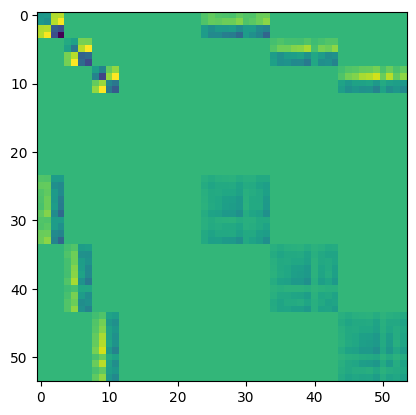

In [96]:
plt.imshow(P)

In [97]:
eig,_=np.linalg.eig(P)

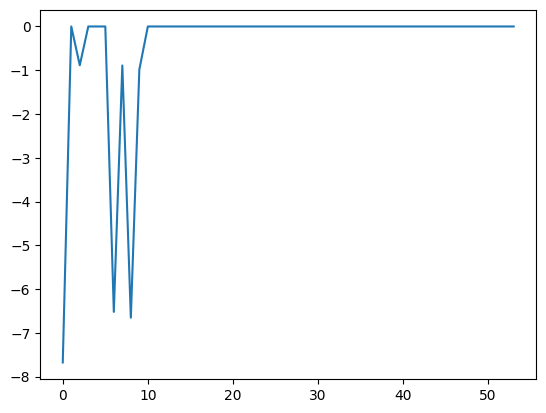

In [98]:
plt.plot(eig)

In [99]:
obj_func=cp.quad_form(cp.vstack(x),P)
obj_func

Expression(CONCAVE, NONPOSITIVE, (1, 1))

In [100]:

for j in range(len_j):
    for l in range(len_l):
        obj_func += lambda_j_l[j, l]

for h in range(len_h):
    for i in range(len_I_h):
        for u in range(len_u):
            obj_func += lambda_h_i[h, i] * (1/2 * M[h][i, u] + q[h][i, 0])

for j in range(len_j):
    for s in range(len_s):
        obj_func += (-1/2) * (eta_j_s[j, s] - eta_hat_j_s[j, s])

obj_func

Expression(CONCAVE, UNKNOWN, (1, 1))

In [101]:
constraint_1 = 0

for j in range(len_j):
    for h in range(len_h):
        for i in range(len_I_h):
            for u in range(len_u):
                constraint_1 += lambda_h_i[h, i] * M[h][i, u]

    for l in range(len_l):
        constraint_1 += (-2) * lambda_j_l[j, l] * y_L[j][0, l]

    for s in range(len_s):
        constraint_1 += (-1) * (eta_j_s[j, s] - eta_hat_j_s[j, s])

In [106]:
C_1, C_2 = 2.5, 2.5

objective = cp.Maximize(obj_func)

constraints = [
    constraint_1 == 0,
    lambda_j_l >=0,
    lambda_j_l <= C_1,
    lambda_h_i >= 0,
    lambda_h_i <= C_2,
    eta_j_s >=0,
    eta_hat_j_s >= 0
]


problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Sep 24 10:30:55 AM: Your problem has 84 variables, 7 constraints, and 0 parameters.
(CVXPY) Sep 24 10:30:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 24 10:30:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 24 10:30:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 24 10:30:55 AM: Compiling problem (target solver=OSQP).
(CVXPY) Sep 24 10:30:55 AM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp ->

In [103]:
result

390.0008743354754

In [104]:
lambda_j_l.value

array([[3.28307247e-01, 2.00439411e-01, 2.50000090e+00, 2.50000084e+00],
       [4.02589365e-05, 3.87174153e-01, 2.50000052e+00, 2.50000014e+00],
       [2.49425874e-05, 2.92620709e-02, 2.49999974e+00, 2.50000114e+00]])

## formulation of $p_j(\bold x)$ 

$$
\begin{align*}
p_j(\bold x)
&= \omega^*_j \cdot \phi_j(\bold x) + b^*_j \\
&= 2 \sum^{l_j}_{l=1} \lambda^*_{j_l} y_l k_j(\bold x_l, \bold x) 
- \sum^H_{h=1} \sum^{I_h}_{i=1} \lambda^*_{h_i} \sum^{u_j}_{u=1} M^h_{i,u} k_j(\bold x_u, \bold x) 
+ \sum^{s_j}_{s=1}(\eta^*_{j_s} - \bar\eta^*_{j_s}) k_j(\bold x_s, \bold x)
+ b^*_j
\end{align*}
$$

In [126]:
k = lambda x1, x2: x1.T @ x2 + 1

def p_j(x, j=0):
    term1 = 0
    for l in range(len_l):
        term1 += lambda_j_l.value[j][l] * y_L[j][0, l] * k(x_L[j][:, l], x)

    term2 = 0
    for h in range(len_h):
        for i in range(len_I_h):
            for u in range(len_u):
                term2 += lambda_h_i.value[h][i] * M[h][i,u] * k(x_U_tmp[:, u], x)
    term2 *= -1

    term3 = 0
    for s in range(len_s):
        term3 += (eta_j_s.value[j,s] - eta_hat_j_s.value[j,s]) * k(x_S[j][:, s], x) # + b[j]
    return term1 + term2 + term3

In [125]:
x_test = np.random.rand(2)
x_test

array([0.5874837 , 0.95806076])

In [127]:
p_j(x_test)

-5.054707993662028

In [ ]:
for i in range(10):
    

In [42]:
M[h][i,u]

1

In [41]:
lambda_h_i

Variable((2, 6), nonneg=True)

In [30]:
lambda_j_l.value

array([[3.28307247e-01, 2.00439411e-01, 2.50000090e+00, 2.50000084e+00],
       [4.02589365e-05, 3.87174153e-01, 2.50000052e+00, 2.50000014e+00],
       [2.49425874e-05, 2.92620709e-02, 2.49999974e+00, 2.50000114e+00]])

In [35]:
lambda_j_l

Variable((3, 4), nonneg=True)

In [34]:
y_L[0]

array([[-1, -1,  1,  1]])

In [32]:
y_L

[array([[-1, -1,  1,  1]]),
 array([[-1, -1,  1,  1]]),
 array([[-1, -1,  1,  1]])]

In [37]:
x_L[0][:, 0]

array([0.1, 0.5])

In [38]:
a = 1
a *= -1
a

-1